In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os, sys
import warnings
warnings.filterwarnings('ignore')

os.getcwd()



'/content'

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils import plot_model



from keras.preprocessing.image import ImageDataGenerator  # Data Augmentation library
from keras.utils import array_to_img, img_to_array,load_img

# Load image for data augmentation

In [4]:
cat_image=load_img('/content/kitten.jpg')
cat_array=img_to_array(cat_image)
cat=cat_array.reshape((1,)+cat_array.shape)

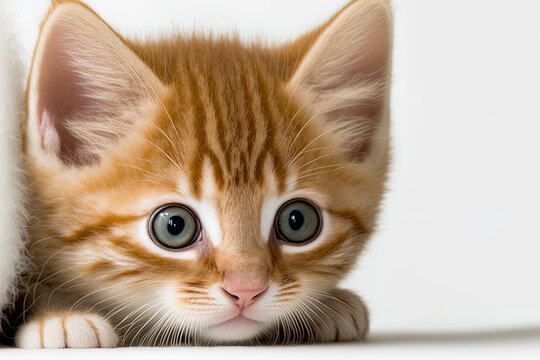

In [5]:
cat_image

In [6]:
def plot_images(orig_image, updated_iamge):
  plt.figure(figsize=(15,10))
  plt.grid(False)

#Original Image
  plt.subplot(1,2,1)
  plt.grid(False)
  plt.imshow(orig_image)
  plt.title('Orginal Image')


#Transformed Image

  plt.subplot(1,2,2)
  plt.title('Transformed Image')
  plt.grid(False)
  plt.imshow(updated_iamge)
  plt.show()





# Data Augmentation - Flip the image

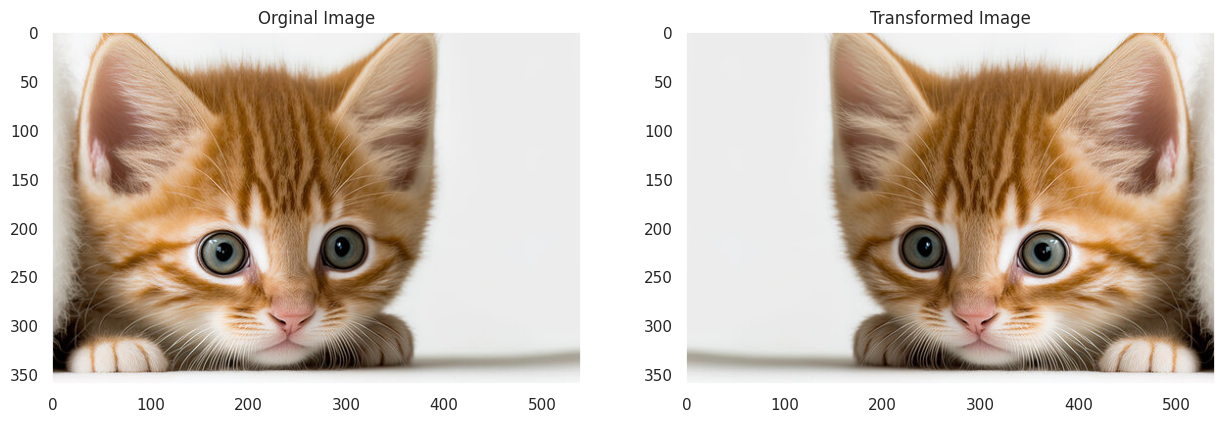

In [11]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

# Vertical Flip

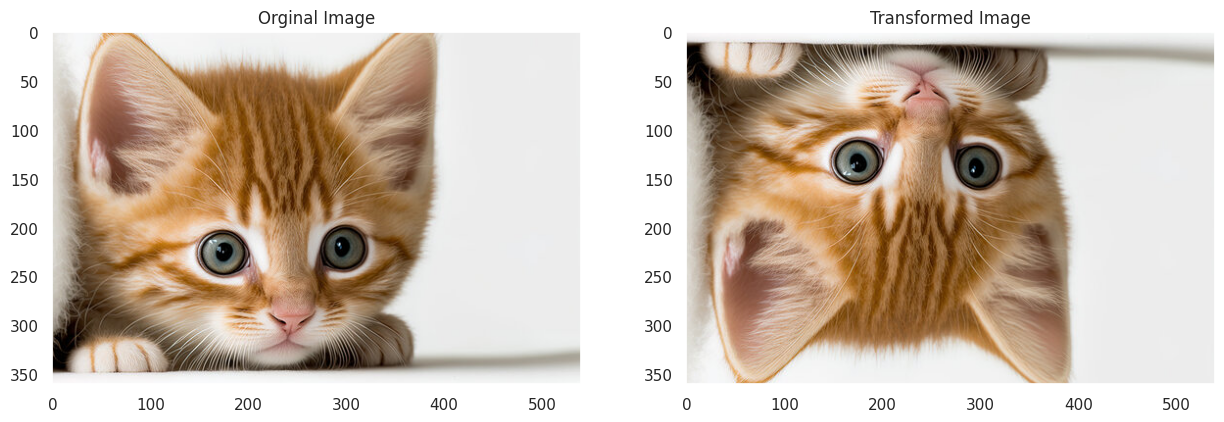

In [12]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

# Height shift

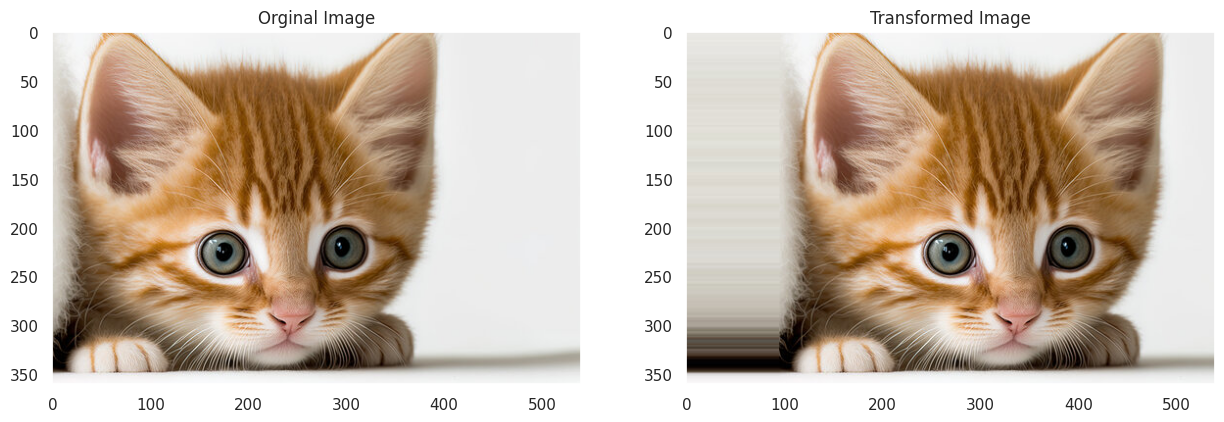

In [13]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=200)
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

#Rotation

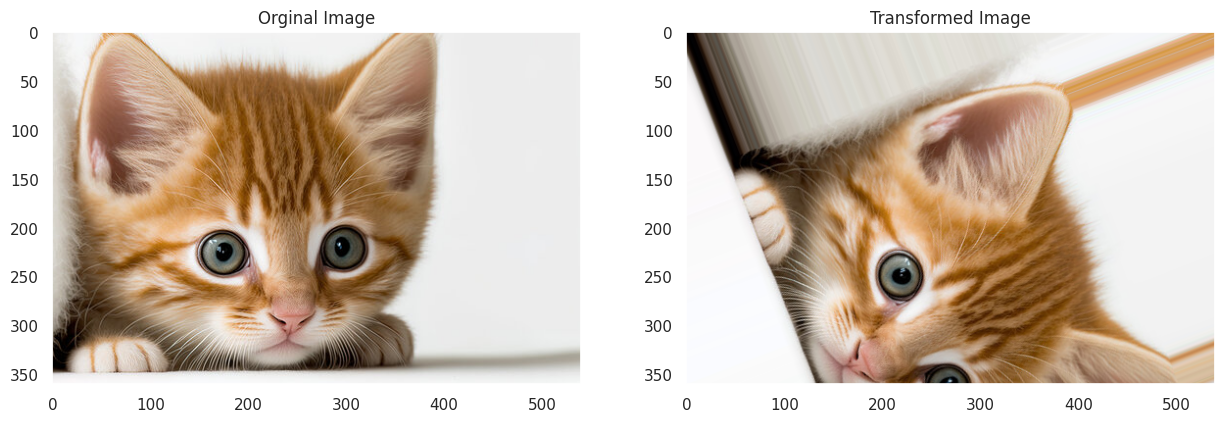

In [14]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=100)
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

#Zoom in, Zoom-out

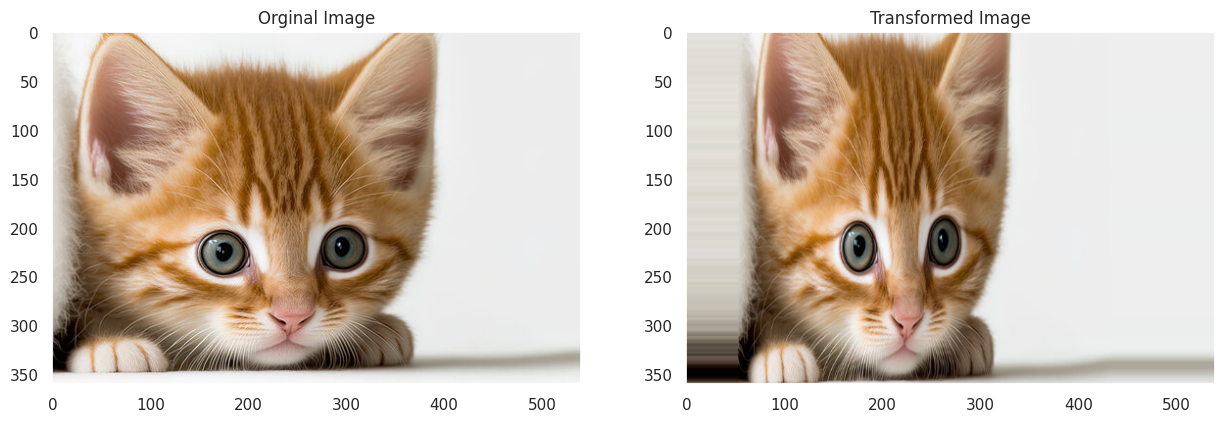

In [19]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=(1.5,0.0))
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

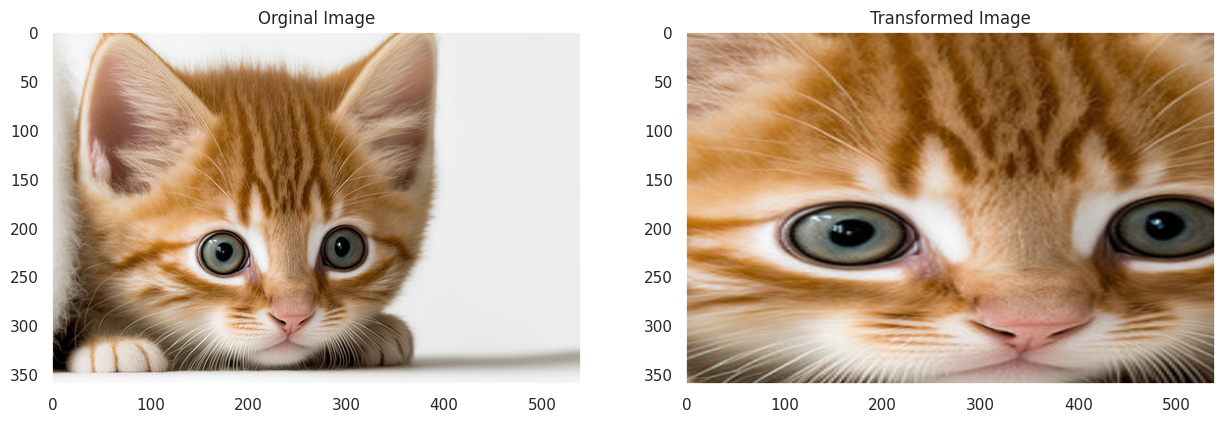

In [20]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=(0.0,1.2))
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

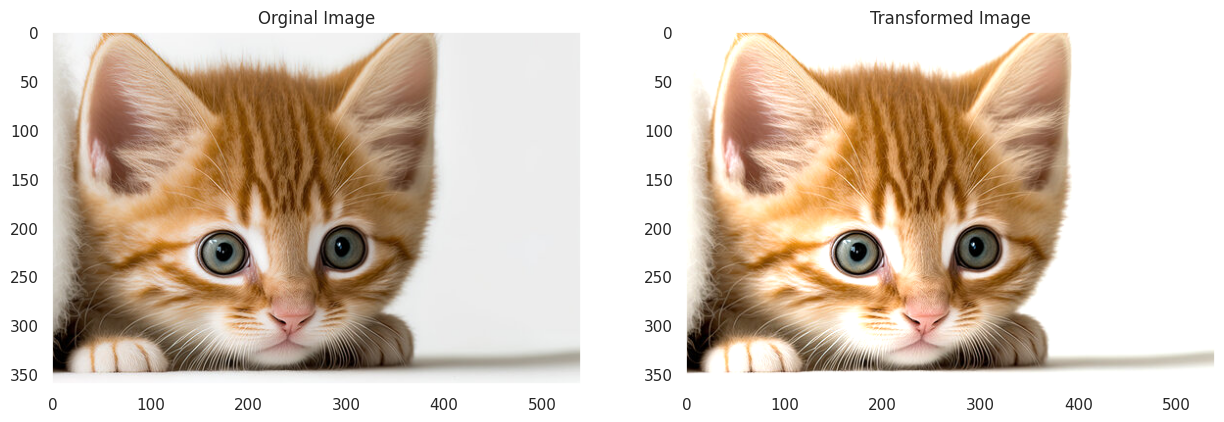

In [67]:
transformation= tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.5,1.5])
tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)

# Brightness change

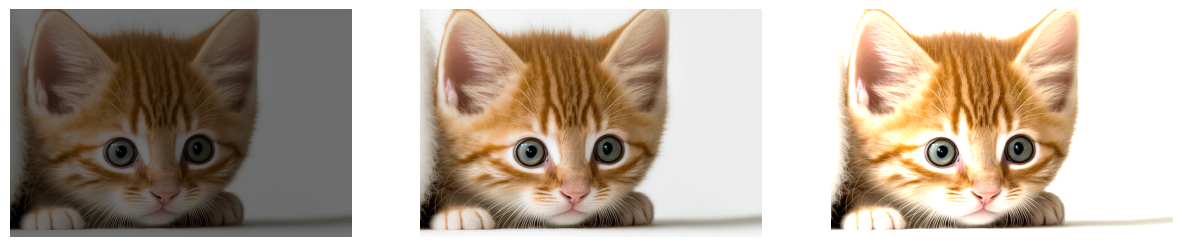

In [66]:
# ImageDataGenerator brightness
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])

# iterator
aug_iter = datagen.flow(cat_array.reshape(1,360,540,3), batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')

	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

#Final

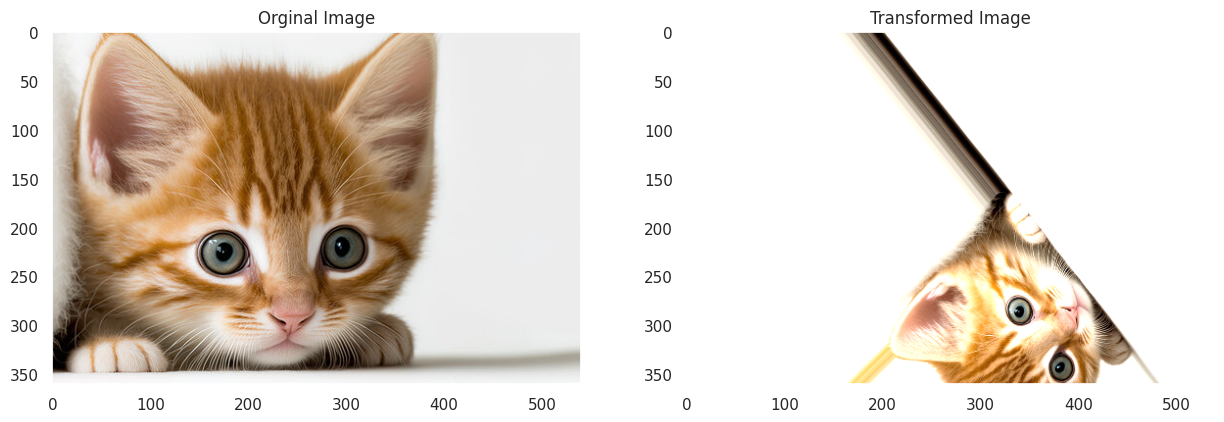

In [32]:


transformation= tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=True,
    rotation_range=200,
    width_shift_range=1.0,
    height_shift_range=0.0,
    brightness_range=(0.0,1.5),
    shear_range=1.5,
    channel_shift_range=1.5,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=True)

tranformed_array= transformation.random_transform(cat_array)
transformed_image= keras.preprocessing.image.array_to_img(tranformed_array)

plot_images( cat_image, transformed_image)



In [45]:
directory='/content/sample_data'

i=0

for batch in transformation.flow(cat, batch_size=1, save_to_dir=directory , save_prefix='cat_image', save_format='jpg'):
  i+=1
  if i>25:
    break




In [46]:
from PIL import Image
import os

Augmented_images_pth='/content/sample_data'
os.chdir(Augmented_images_pth)
augmented_images=os.listdir()
augmented_images=[files for files in augmented_images if files.endswith (('.jpg','jpeg', 'png' ) )]
images=[Image.open(image) for image in augmented_images]


In [47]:
len(images)

26

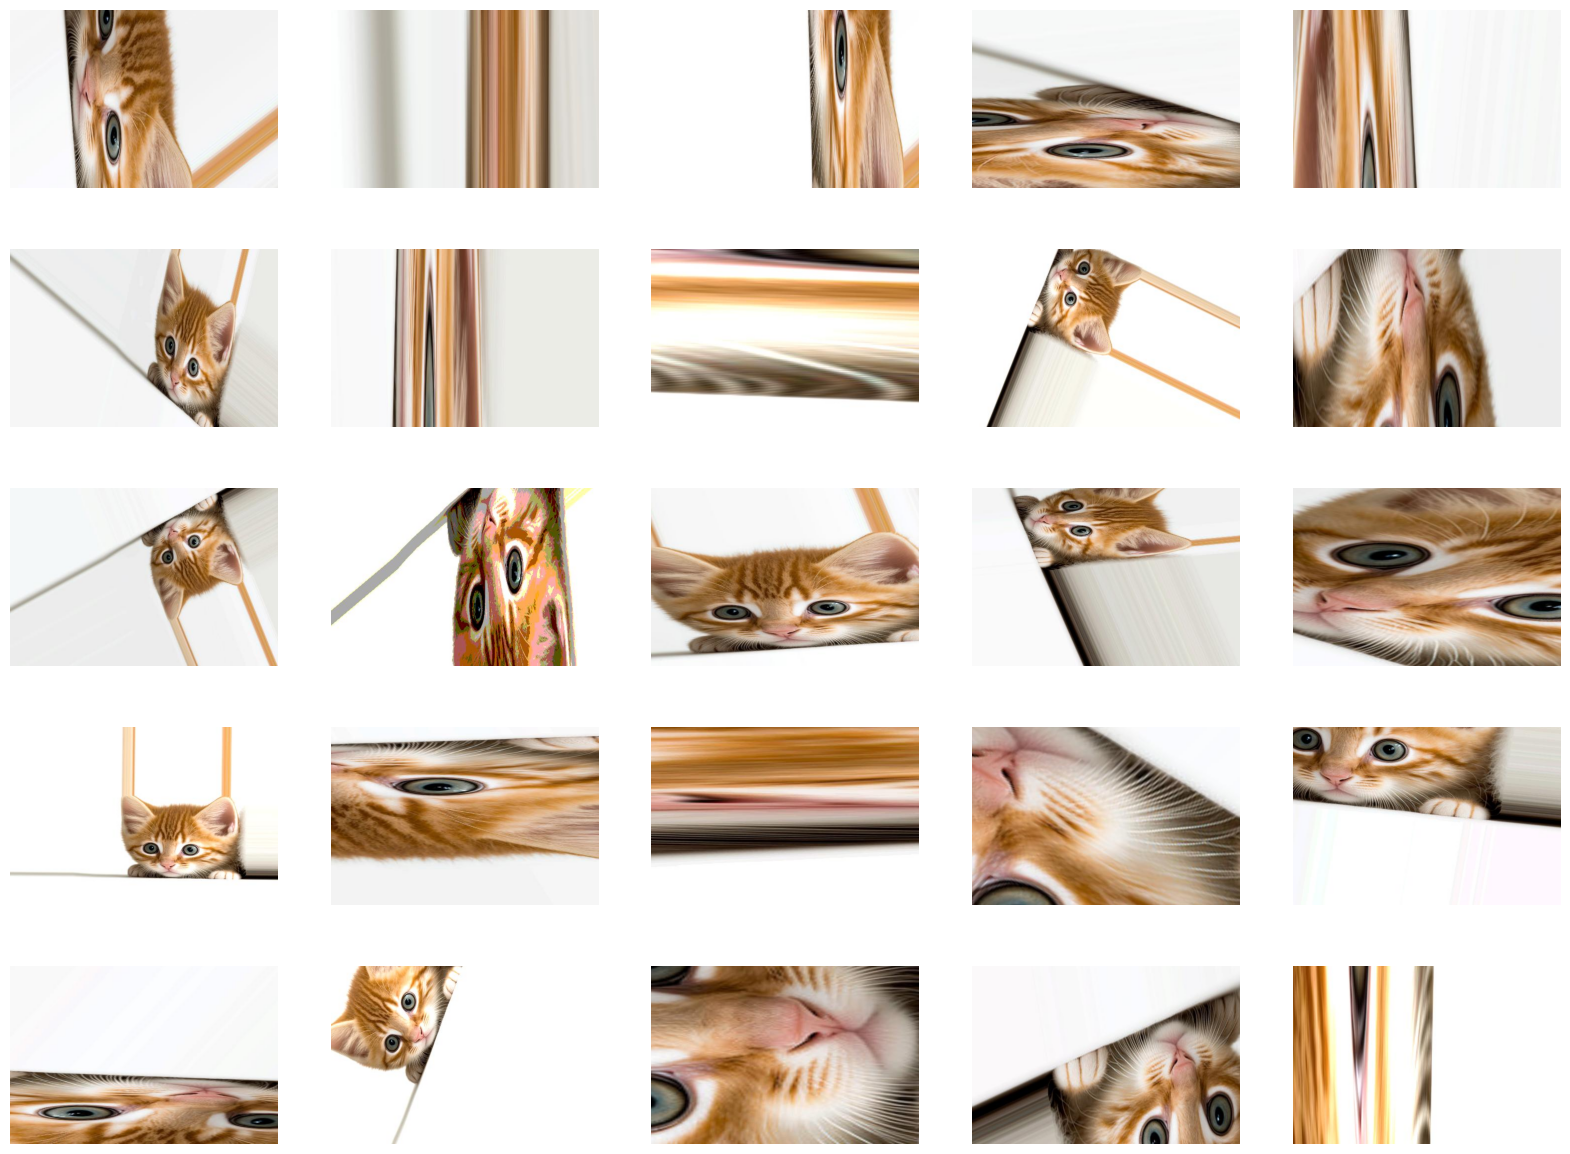

In [48]:
fig , axes= plt.subplots(5,5, figsize=(20,15))
axes = axes.flatten()

# generate batch of images
for idx  in range(1, len(images)):
  if idx<=len(images):
    plt.subplot(5,5,idx)
    plt.imshow(images[idx-1])
    plt.axis('off')
  else:
    plt.subplot(5,5,idx)
    plt.axis('off')
plt.show()

In [ ]:
# all the augemened images are saved in content/sample_data